In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання
## 1. Згенерувати вибірки обсягом $N=25; N=50; N=75; N=100; N=150$ наступних типів:
- ### Нормально розподілених випадкових величин з такими параметрами: $\mu=N_{бр}$, $\sigma=0,1N_{бр}$
- ### Рівномірно розподілених випадкових величин з параметром з діапазону $[0,\beta], \beta=N_{бр}$
- ### Випадкових величин, які підпорядковуються експоненціальному закону розподілу з параметром $\lambda=N_{бр}$
## 2. Для кожного $N$ обчислити точкові оцінки параметрів вищеназваних законів розподілу
## 3. Побудувати графіки, на яких зобразити дійсне значення параметру та залежність точкової оцінки від обсягу вибірки $N$
Мій номер бригади $N_{бр} = 1$

=======================N=25=======================
Normal Distribution:
Expected Value: 0.9651722859937613
Corrected Standard Deviation: 0.11471839552174473

Uniform Distribution:
Beta Method 1: 1.1065398800175683
Beta Method 2: 1.038277098832027

Exponential Distribution:
Lambda: 1.136833095004269
=======================N=50=======================
Normal Distribution:
Expected Value: 1.0022462808845387
Corrected Standard Deviation: 0.11224896962110423

Uniform Distribution:
Beta Method 1: 1.0345993932104112
Beta Method 2: 1.0158207501687722

Exponential Distribution:
Lambda: 1.3877320983624206
=======================N=75=======================
Normal Distribution:
Expected Value: 1.015257646514567
Corrected Standard Deviation: 0.0941326582834651

Uniform Distribution:
Beta Method 1: 0.9538327891409718
Beta Method 2: 1.0122980262326284

Exponential Distribution:
Lambda: 0.8588859836945606
======================N=100=======================
Normal Distribution:
Expected Value: 0.99429809

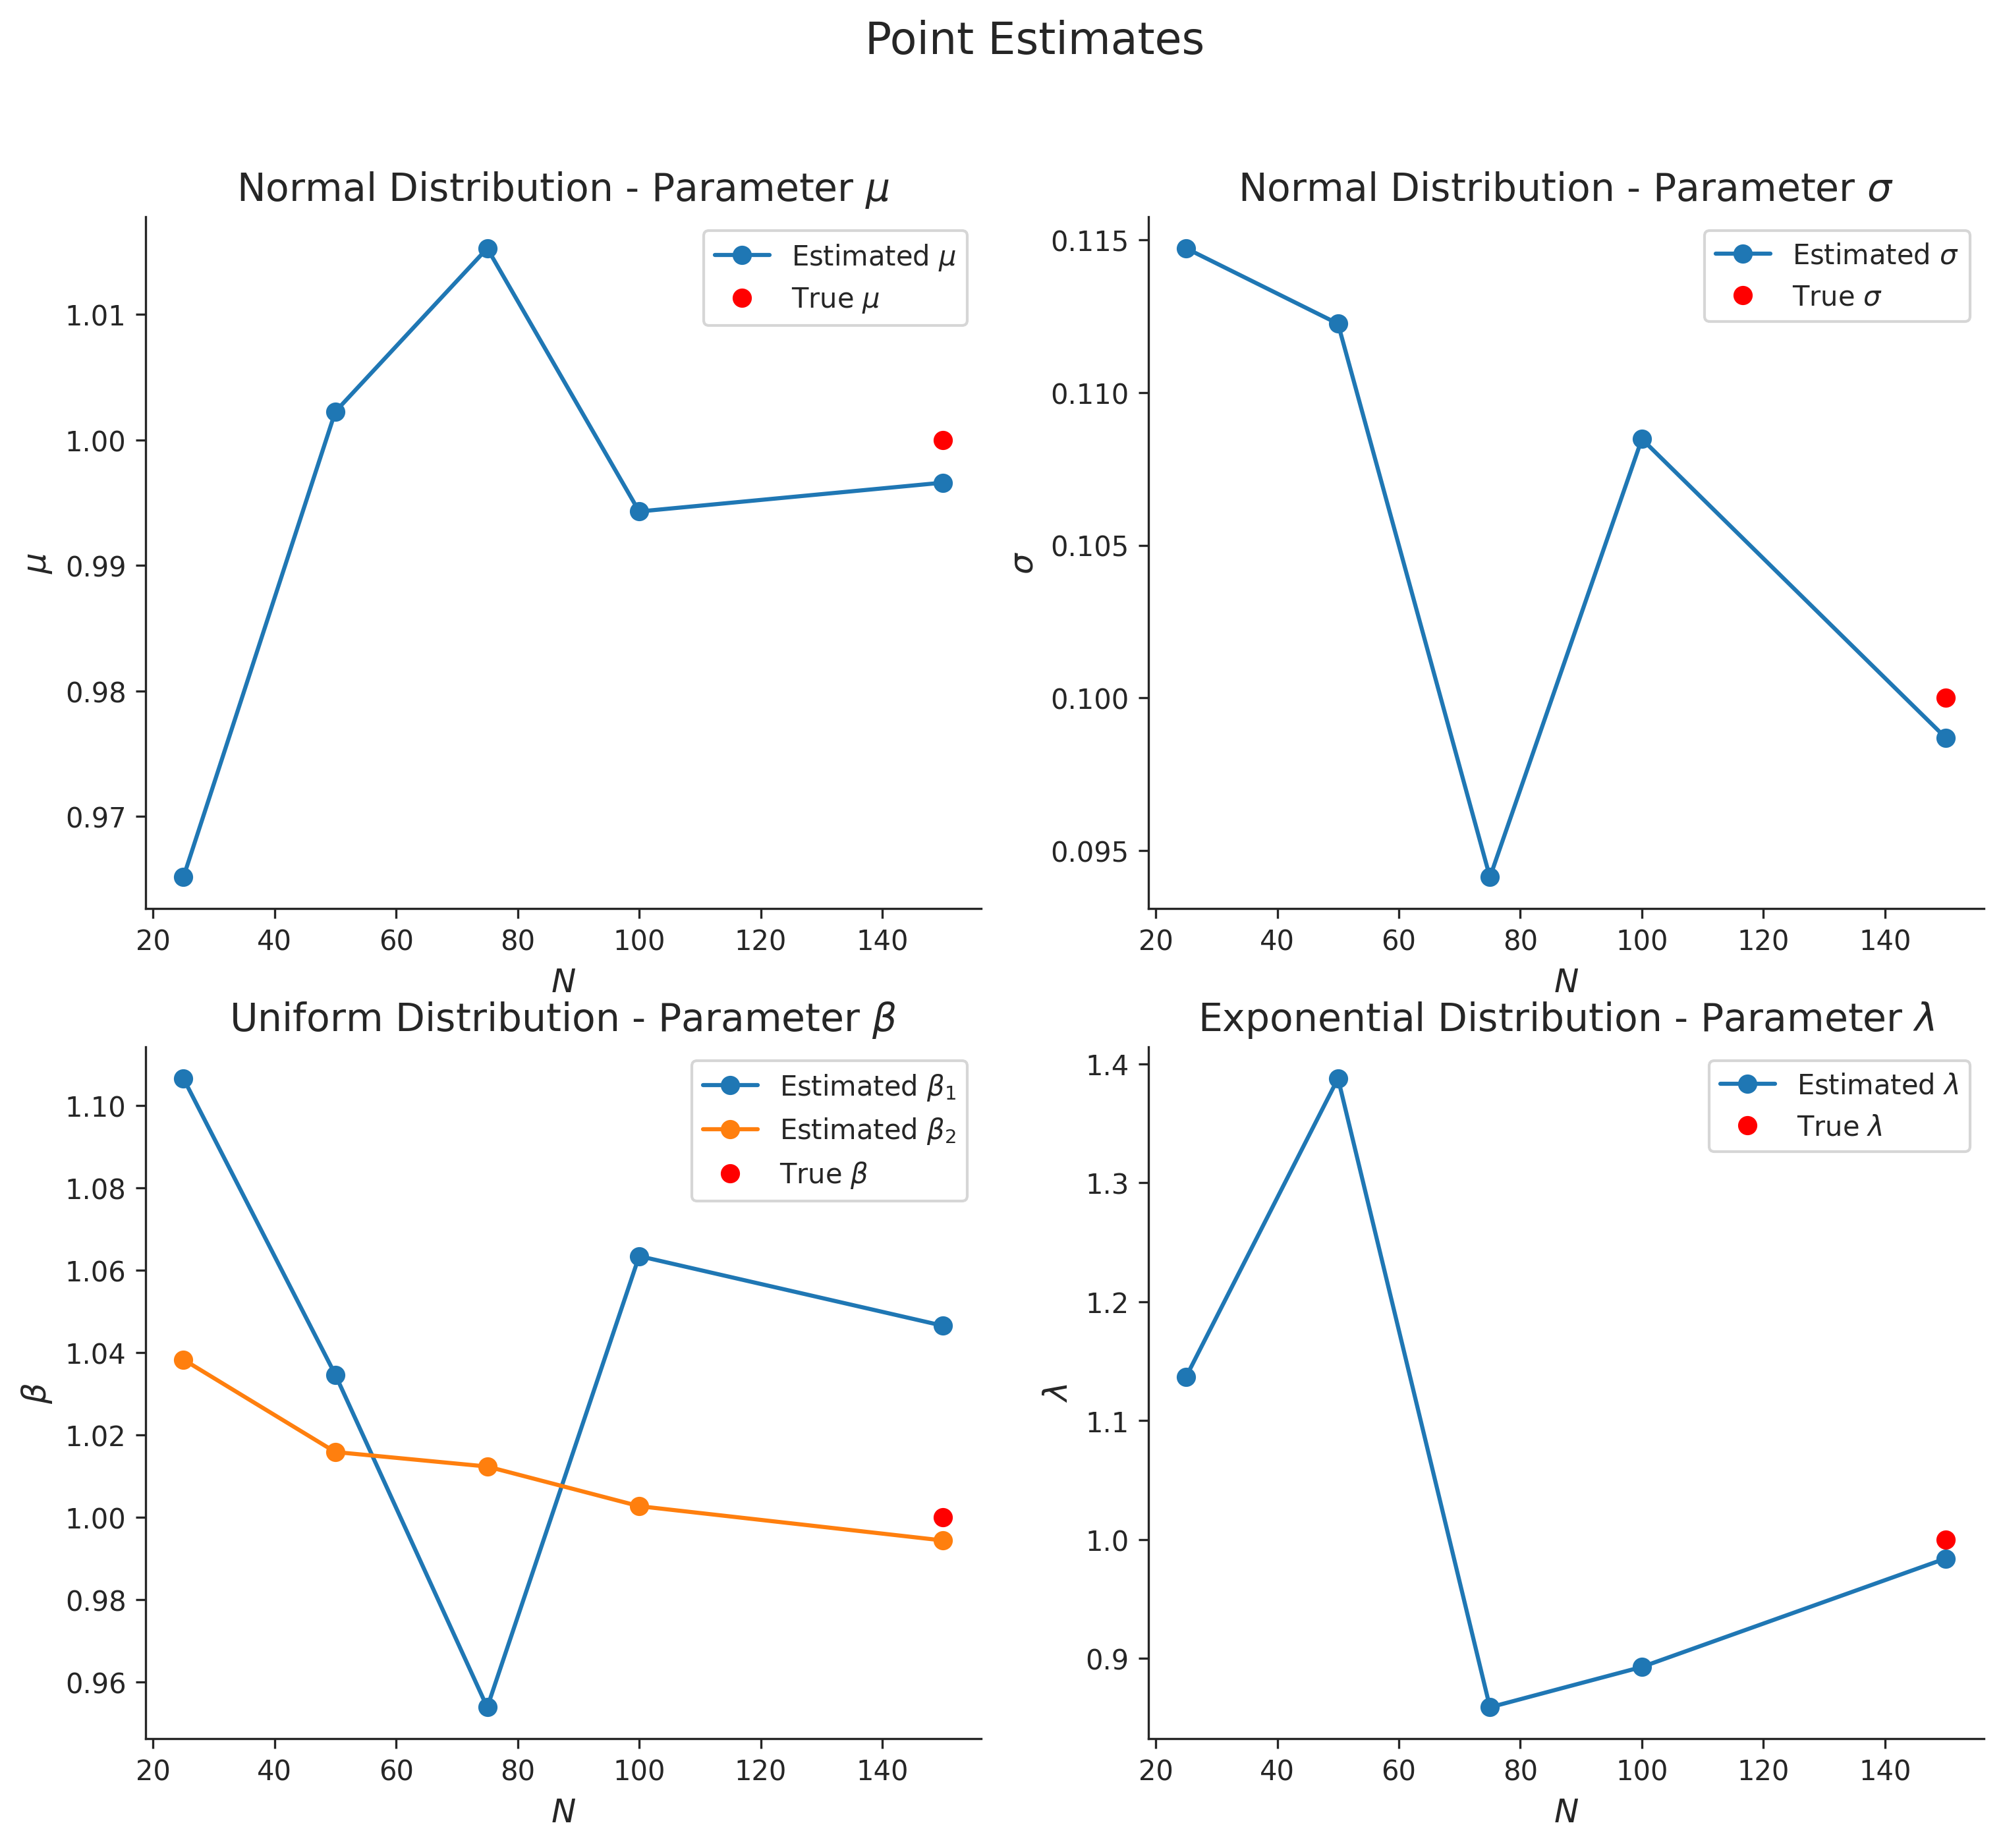

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), dpi=300)
fig.suptitle('Point Estimates', fontsize=16)

ax1.set_title('Normal Distribution - Parameter $\mu$', fontsize=14)
ax1.set_xlabel('$N$', fontsize=12)
ax1.set_ylabel('$\mu$', fontsize=12)

ax2.set_title('Normal Distribution - Parameter $\sigma$', fontsize=14)
ax2.set_xlabel('$N$', fontsize=12)
ax2.set_ylabel('$\sigma$', fontsize=12)

ax3.set_title('Uniform Distribution - Parameter $\\beta$', fontsize=14)
ax3.set_xlabel('$N$', fontsize=12)
ax3.set_ylabel('$\\beta$', fontsize=12)

ax4.set_title('Exponential Distribution - Parameter $\lambda$', fontsize=14)
ax4.set_xlabel('$N$', fontsize=12)
ax4.set_ylabel('$\lambda$', fontsize=12)

n_group = 1
sizes = [25, 50, 75, 100, 150]
mus = []
sigmas = []
betas1 = []
betas2 = []
lambdas = []
for n in sizes:
    print(f'N={n}'.center(50, '='))
    
    x_norm = np.random.normal(n_group, 0.1 * n_group, n)
    x_uni = np.random.uniform(0, n_group, n)
    x_exp = np.random.exponential(1 / n_group, n)

    mu = x_norm.mean()
    std = x_norm.std(ddof=1)
    mus.append(mu)
    sigmas.append(std)
    print('Normal Distribution:')
    print('Expected Value:', mu)
    print('Corrected Standard Deviation:', std)

    beta1 = np.mean(2 * x_uni)
    beta2 = ((len(x_uni) + 1) * x_uni.max()) / len(x_uni)
    betas1.append(beta1)
    betas2.append(beta2)
    print('\nUniform Distribution:')
    print('Beta Method 1:', beta1)
    print('Beta Method 2:', beta2)

    lam = 1 / x_exp.mean()
    lambdas.append(lam)
    print('\nExponential Distribution:')
    print('Lambda:', lam)

ax1.plot(sizes, mus, '-o', label='Estimated $\mu$')
ax1.plot(sizes[-1], n_group, 'ro', label='True $\mu$')
ax1.legend()

ax2.plot(sizes, sigmas, '-o', label='Estimated $\sigma$')
ax2.plot(sizes[-1], 0.1 * n_group, 'ro', label='True $\sigma$')
ax2.legend()

ax3.plot(sizes, betas1, '-o', label='Estimated $\\beta_1$')
ax3.plot(sizes, betas2, '-o', label='Estimated $\\beta_2$')
ax3.plot(sizes[-1], n_group, 'ro', label='True $\\beta$')
ax3.legend()

ax4.plot(sizes, lambdas, '-o', label='Estimated $\lambda$')
ax4.plot(sizes[-1], n_group, 'ro', label='True $\lambda$')
ax4.legend()

sns.despine()
plt.show()

## 4. Для п’яти вибірок нормально розподілених випадкових величин розрахувати інтервальні оцінки математичного сподівання і дисперсії.

In [3]:
def exp_val_int_est(arr, p):
    alpha = 1 - p
    mean = arr.mean()
    var = arr.var(ddof=1)
    delta = stats.t.ppf(1 - alpha / 2, len(arr) - 1) * np.sqrt(var / len(arr))
    return mean - delta, mean + delta


def var_int_est(arr, p):
    alpha = 1 - p
    var = arr.var(ddof=1)
    A = stats.chi2.ppf(1 - alpha / 2, len(arr) - 1)
    B = stats.chi2.ppf(alpha / 2, len(arr) - 1)
    return ((len(arr) - 1) * var) / A, ((len(arr) - 1) * var) / B 


exp_vals = {}
var_vals = {}
probs = [0.99, 0.95, 0.9, 0.75]
sizes = [25, 50, 75, 100, 150]
for n in sizes:
    x = np.random.normal(n_group, 0.1 * n_group, n)
    exp_vals[f'$N={n}$'] = [pd.Interval(*(round(b, 4) for b in exp_val_int_est(x, p)), 'both') for p in probs]
    var_vals[f'$N={n}$'] = [pd.Interval(*(round(b, 4) for b in var_int_est(x, p)), 'both') for p in probs]

mean_df = pd.DataFrame.from_dict(exp_vals, 'index', columns=[f'$P={p}$' for p in probs])
print('Expected Value')
display(mean_df)

var_df = pd.DataFrame.from_dict(var_vals, 'index', columns=[f'$P={p}$' for p in probs])
print('Variance')
display(var_df)

Expected Value


,$P=0.99$,$P=0.95$,$P=0.9$,$P=0.75$
$N=25$,"[0.9381, 1.0638]","[0.9545, 1.0474]","[0.9625, 1.0394]","[0.9744, 1.0275]"
$N=50$,"[0.9614, 1.0456]","[0.9719, 1.0351]","[0.9772, 1.0299]","[0.9852, 1.0218]"
$N=75$,"[0.9804, 1.0409]","[0.9878, 1.0335]","[0.9916, 1.0297]","[0.9974, 1.0239]"
$N=100$,"[0.9665, 1.0172]","[0.9727, 1.011]","[0.9758, 1.0078]","[0.9807, 1.003]"
$N=150$,"[0.9858, 1.0269]","[0.9908, 1.0219]","[0.9933, 1.0194]","[0.9973, 1.0154]"


Variance


,$P=0.99$,$P=0.95$,$P=0.9$,$P=0.75$
$N=25$,"[0.0067, 0.0307]","[0.0077, 0.0245]","[0.0083, 0.0219]","[0.0095, 0.0186]"
$N=50$,"[0.0077, 0.0222]","[0.0086, 0.0192]","[0.0091, 0.0178]","[0.01, 0.016]"
$N=75$,"[0.0067, 0.0157]","[0.0073, 0.014]","[0.0076, 0.0132]","[0.0082, 0.0121]"
$N=100$,"[0.0066, 0.0138]","[0.0072, 0.0126]","[0.0075, 0.012]","[0.008, 0.0111]"
$N=150$,"[0.007, 0.0128]","[0.0075, 0.0118]","[0.0077, 0.0113]","[0.0082, 0.0107]"


## 5. Побудувати графіки залежності довжини довірчих інтервалів:
- ### Від обсягу вибірки $N$ при вибраній довірчій імовірності $Р=0.95$

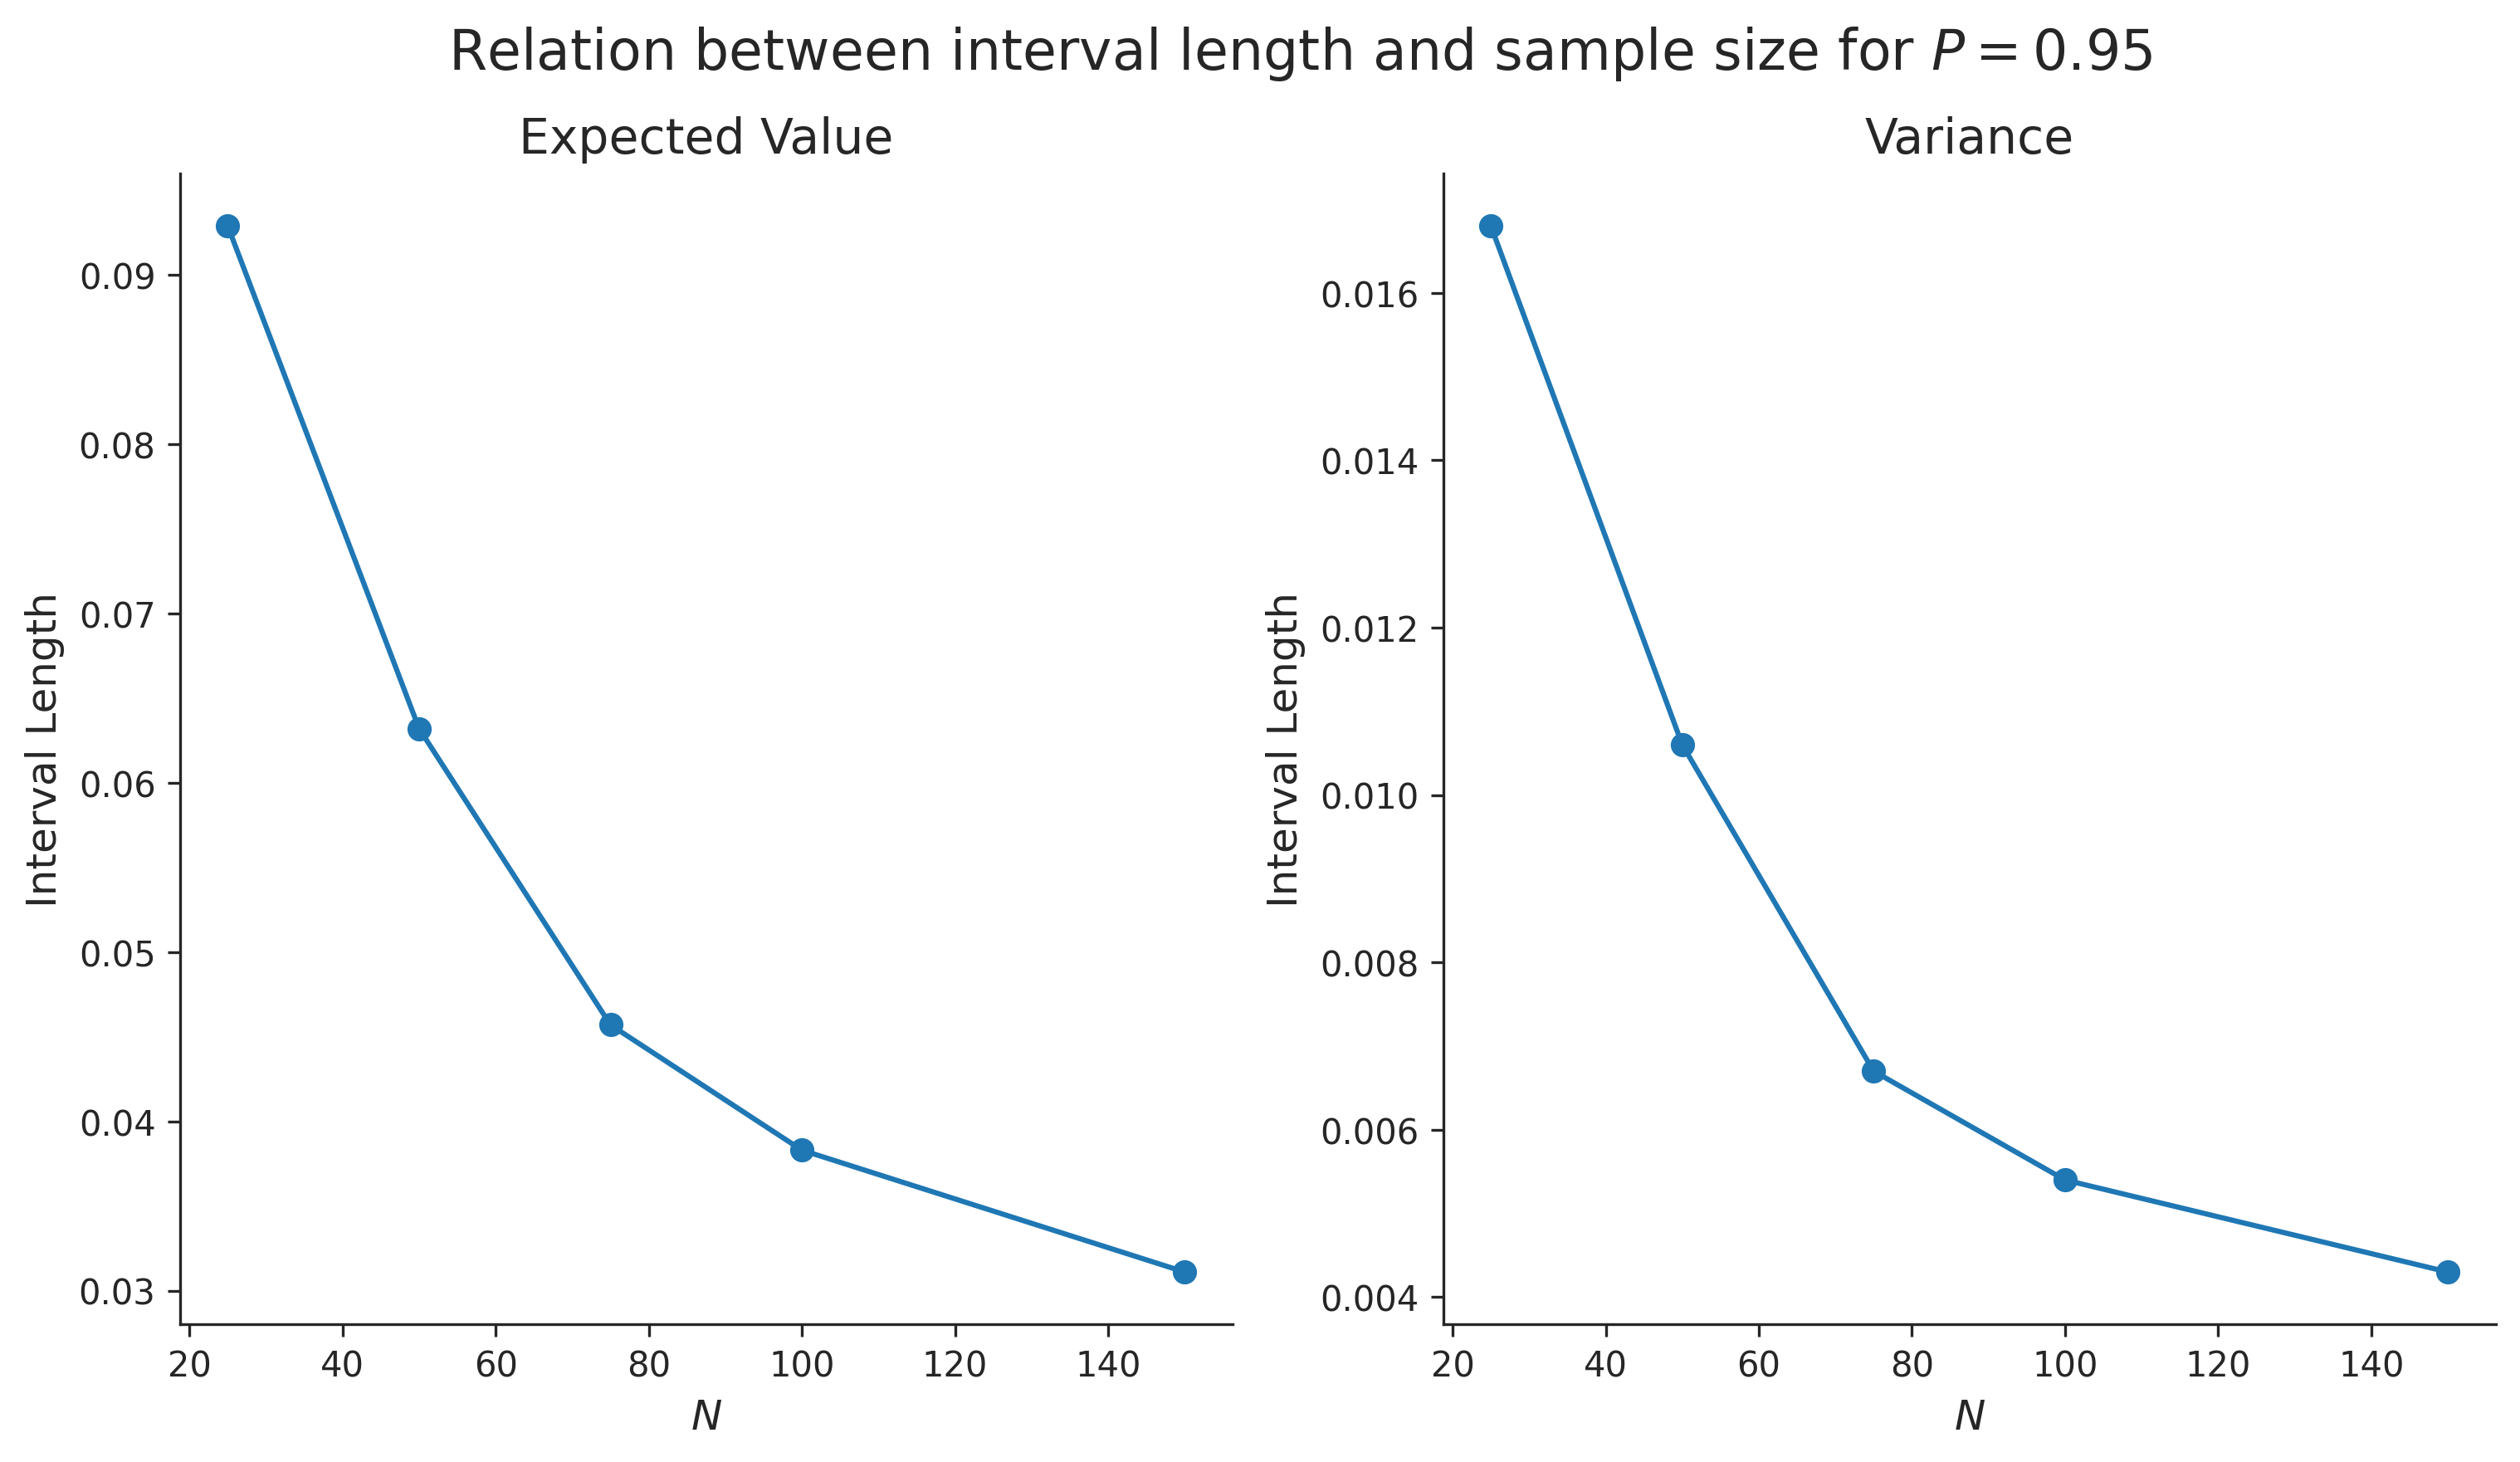

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle('Relation between interval length and sample size for $P=0.95$', fontsize=16)

ax1.set_title('Expected Value', fontsize=14)
ax1.set_xlabel('$N$', fontsize=12)
ax1.set_ylabel('Interval Length', fontsize=12)
ax1.plot(sizes, [i.length for i in mean_df.iloc[:, 1]], '-o')

ax2.set_title('Variance', fontsize=14)
ax2.set_xlabel('$N$', fontsize=12)
ax2.set_ylabel('Interval Length', fontsize=12)
ax2.plot(sizes, [i.length for i in var_df.iloc[:, 1]], '-o')

sns.despine()
plt.show()

- ### Від довірчої імовірності $Р$ при сталому обсязі вибірки $N=50$

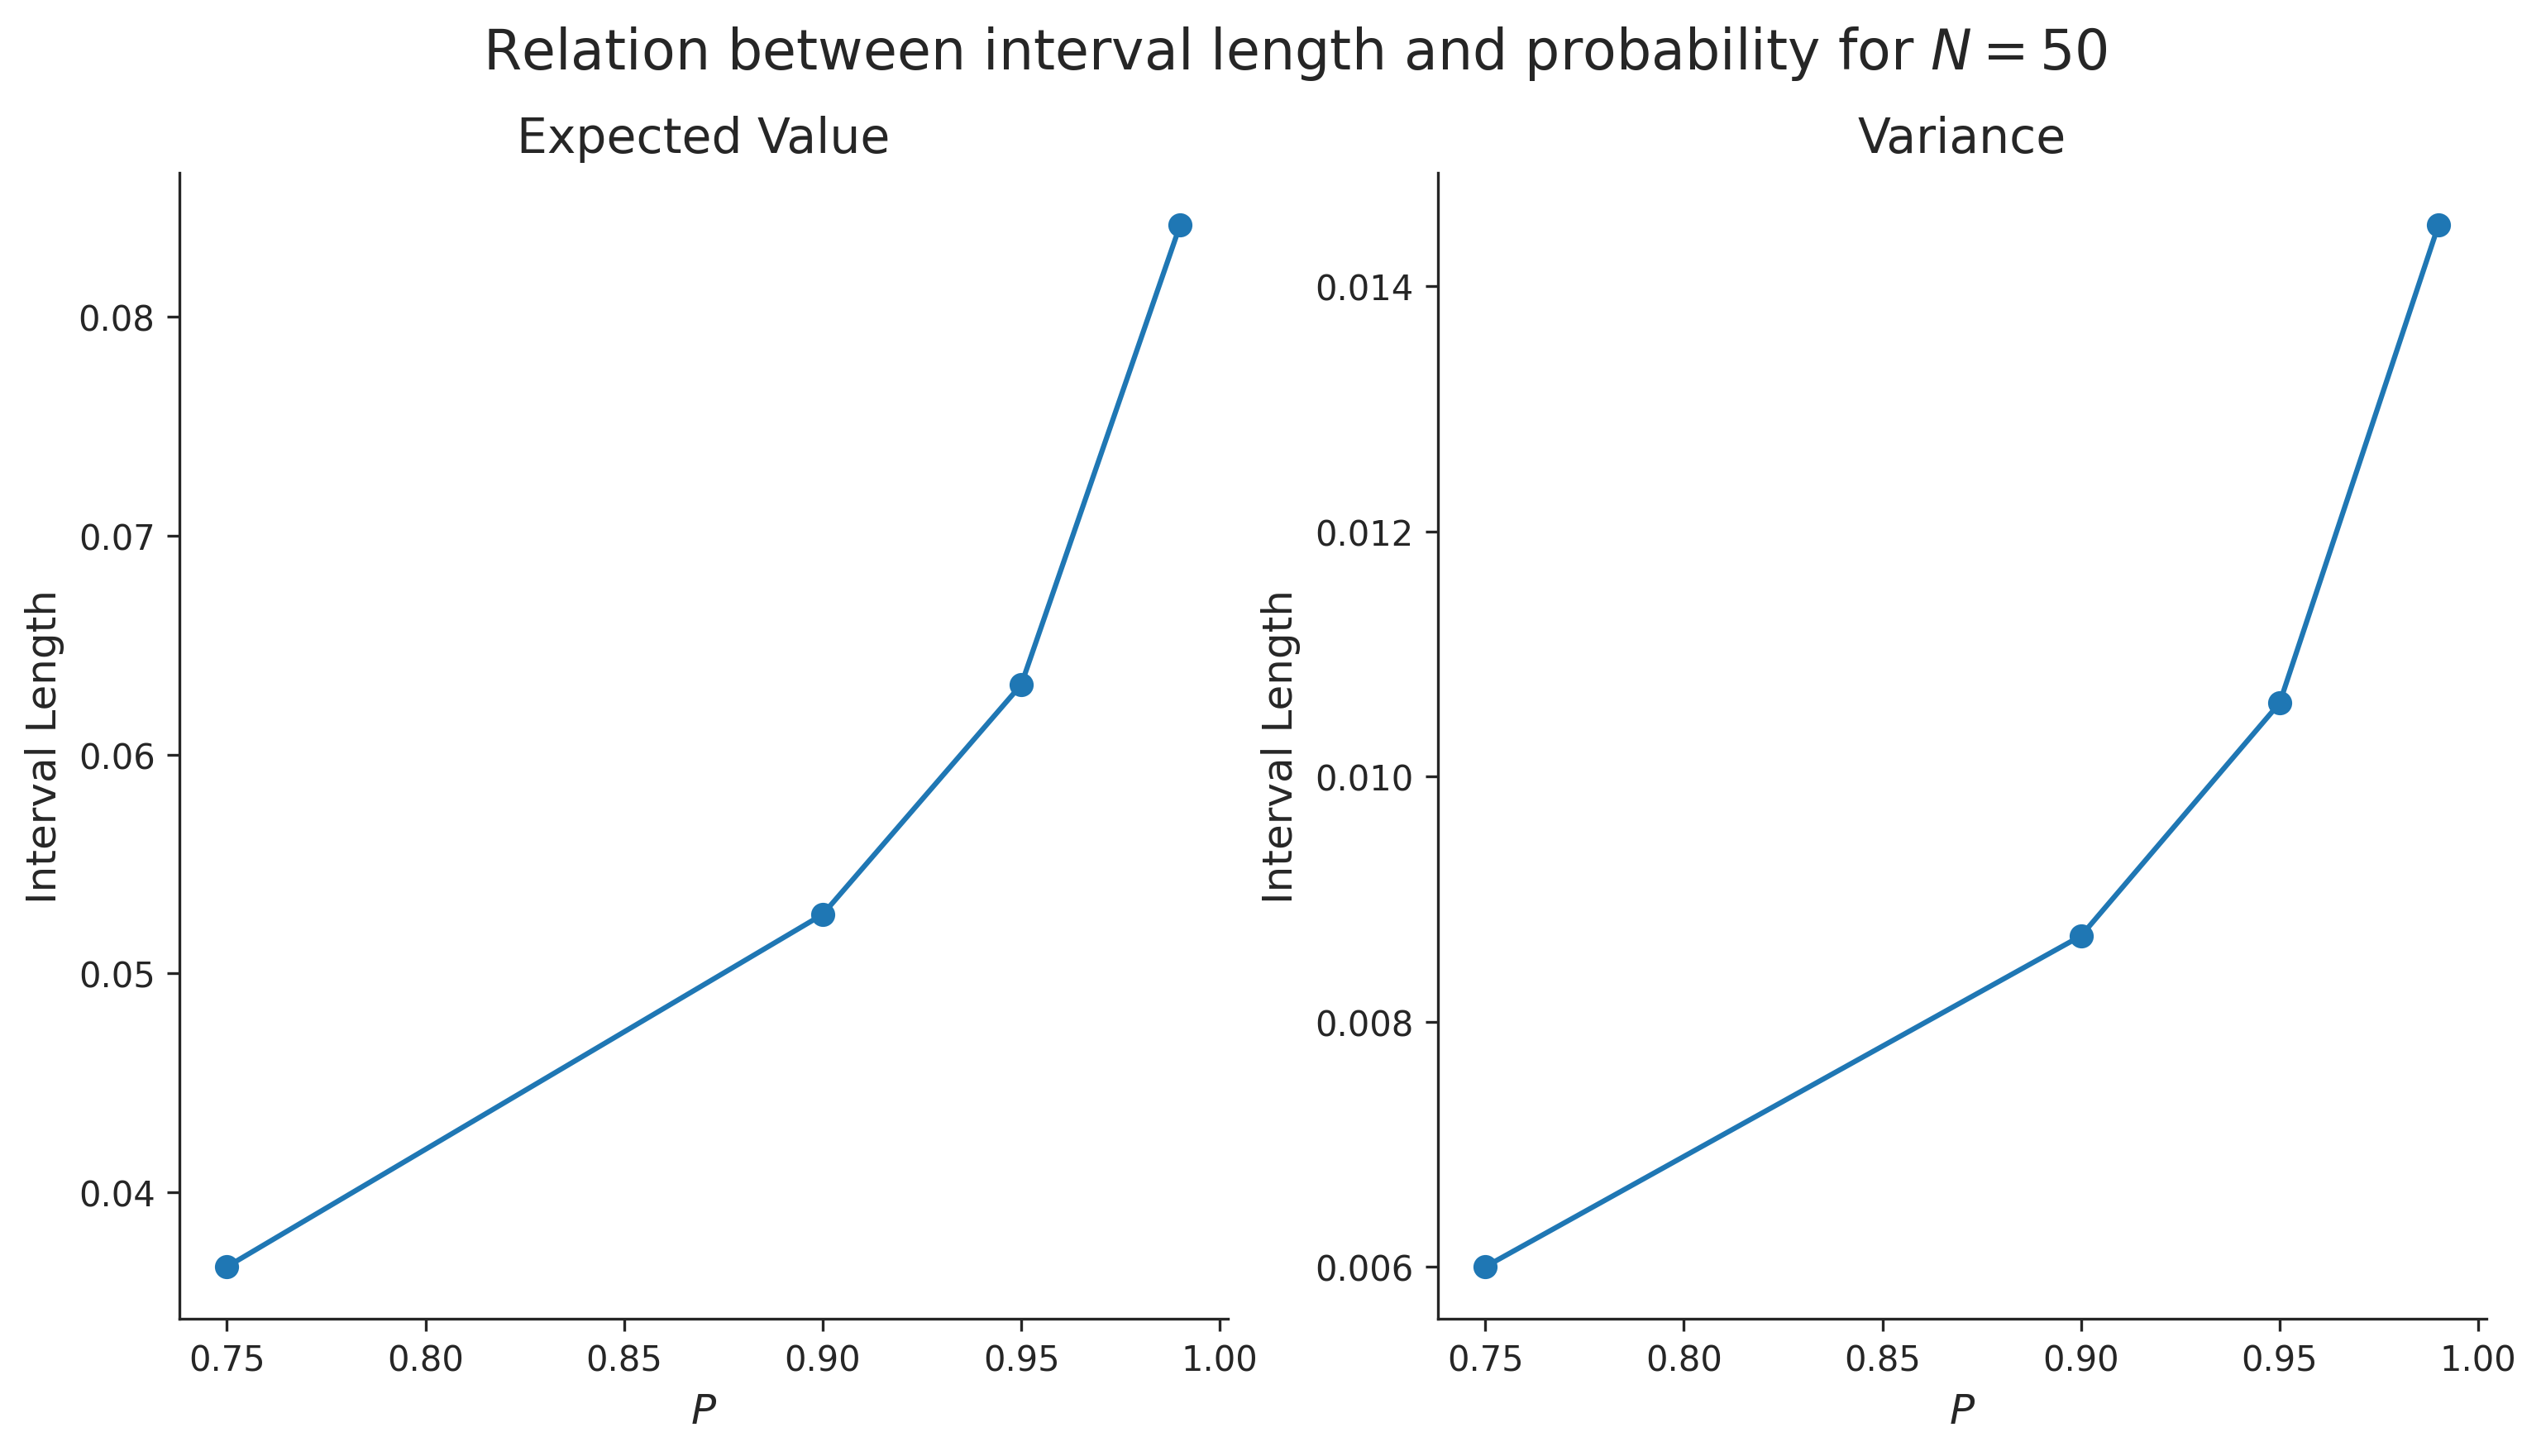

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle('Relation between interval length and probability for $N=50$', fontsize=16)

ax1.set_title('Expected Value', fontsize=14)
ax1.set_xlabel('$P$', fontsize=12)
ax1.set_ylabel('Interval Length', fontsize=12)
ax1.plot(probs, [i.length for i in mean_df.iloc[1]], '-o')

ax2.set_title('Variance', fontsize=14)
ax2.set_xlabel('$P$', fontsize=12)
ax2.set_ylabel('Interval Length', fontsize=12)
ax2.plot(probs, [i.length for i in var_df.iloc[1]], '-o')

sns.despine()
plt.show()